In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
df=pd.read_csv('Insurance claims data.csv')
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Cleaning and Exploration

# 1. Check for missing values
missing_values = df.isnull().sum()

# 2. Convert target column to binary if necessary
# Here, claim_status is already binary (0 or 1). No changes needed.

# 3. Drop unnecessary columns (like 'policy_id') for modeling
columns_to_drop = ['policy_id', 'max_torque', 'max_power']  # Example, can be adjusted
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# 4. Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [6]:
# 5. Split data into features and target
X = df_encoded.drop('claim_status', axis=1)
y = df_encoded['claim_status']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Building

# 7. Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

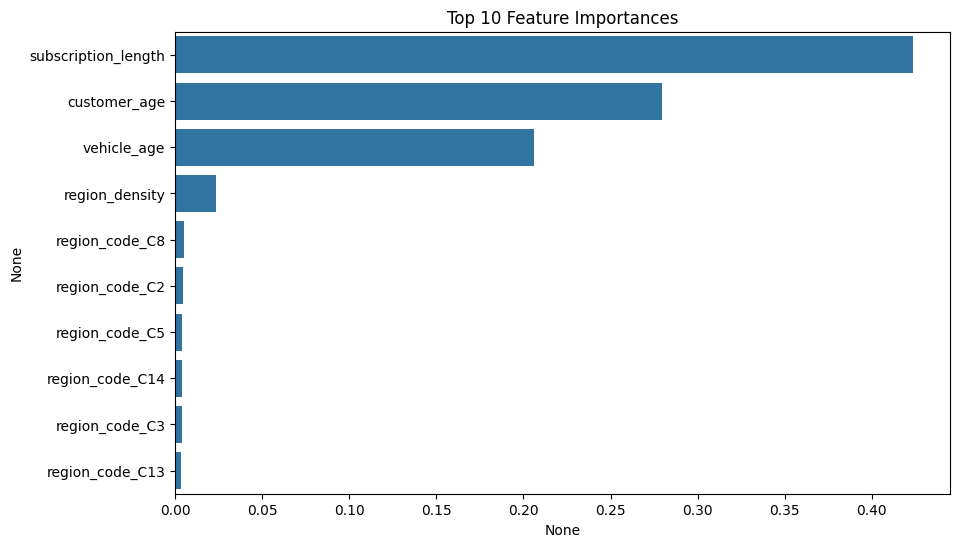

[[10875    94]
 [  736    14]]


0.9291748442699889

In [10]:
# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Feature Importance
feature_importance = rf_model.feature_importances_
important_features = pd.Series(feature_importance, index=X.columns).sort_values(ascending=False)

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features[:10], y=important_features.index[:10])
plt.title('Top 10 Feature Importances')
plt.show()

# Outputs
print(conf_matrix)
class_report
accuracy
